In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from numpy.linalg import norm

## $[\sigma, \beta, \rho] = [10, 8/3, 28]$. Define initial conditions and other given and assumed parameters in the problem. Then define the function $f(x) = \dot{x}$.

In [2]:
x_0a = np.array([1,1,1])
x_0b = x_0a + 1e-10
sigma = 10
beta = 8/3.
rho = 28
tspan = [0,100]
t_eval = np.linspace(tspan[0],tspan[1],15000)

def fun(t, x):
    x = np.asarray(x)
    return np.asarray([sigma * (x[1] - x[0]), x[0] * (rho - x[2]) - x[1], x[0] * x[1] - beta * x[2]])

## Solve the differential equations for initial conditions $x_{0A} = [1,1,1]$ and $ x_{0B} = x_{0A} + 10^{-10}$.

In [3]:
soln_a = solve_ivp(fun, tspan, x_0a, t_eval=t_eval)
soln_b = solve_ivp(fun, tspan, x_0b, t_eval=t_eval)
x_a = soln_a.y
x_b = soln_b.y

## Plot trajectories $x(t)$ with time $t$.

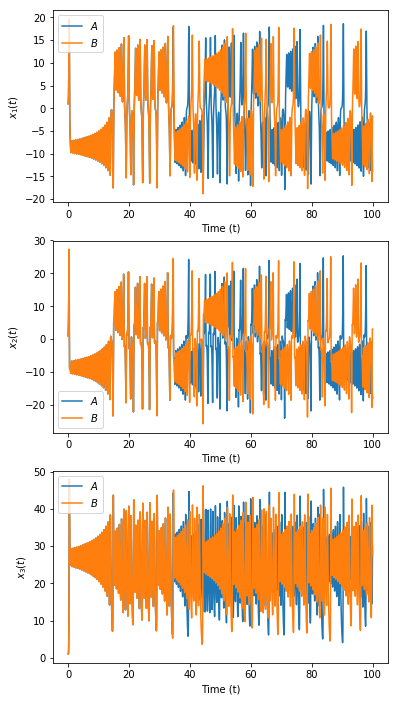

In [4]:
plt.figure(figsize=(6, 12))
for i in range(3):
    plt.subplot(311 + i)
    plt.xlabel('Time (t)')
    plt.ylabel(r'$x_%s(t)$'%(i+1))
    plt.plot(t_eval, x_a[i], label = r'$A$')
    plt.plot(t_eval, x_b[i], label = r'$B$')
    plt.legend()
plt.show()

## We see that the trajectories diverge. 

## Find $ || x_B(t) - x_A(t) || $ and plot it with time $t$.

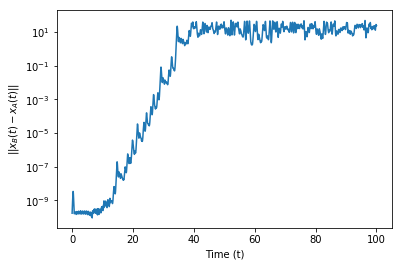

In [5]:
norm2 = norm(x_a - x_b, axis=0)

plt.figure(figsize=(6,4))
plt.semilogy(t_eval, norm2)
plt.xlabel('Time (t)')
plt.ylabel(r'$ || x_B(t) - x_A(t) || $')
plt.show()

## The above (semilog) plot has visibly linear profile in some region, which means that the trajectories diverge almost exponentially in that region.

## We now proceed to do the same as above for $[\sigma, \beta, \rho] = [10, 8/3, 350]$

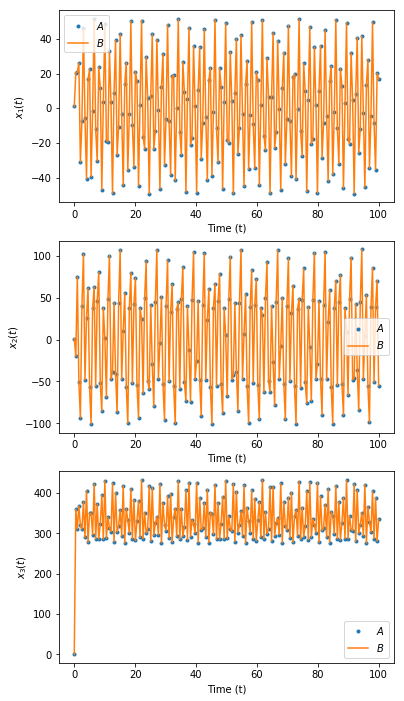

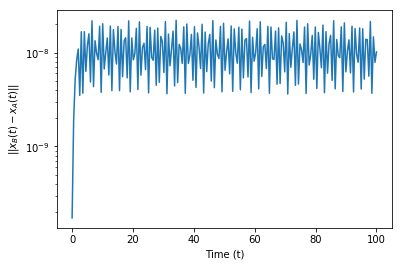

In [6]:
rho = 350
t_eval = np.linspace(0,100,200)

soln_a = solve_ivp(fun, tspan, x_0a, t_eval=t_eval)
soln_b = solve_ivp(fun, tspan, x_0b, t_eval=t_eval)
x_a = soln_a.y
x_b = soln_b.y

plt.figure(figsize=(6, 12))
for i in range(3):
    plt.subplot(311 + i)
    plt.xlabel('Time (t)')
    plt.ylabel(r'$x_%s(t)$'%(i+1))
    plt.plot(t_eval, x_a[i], '.', label = r'$A$')
    plt.plot(t_eval, x_b[i], label = r'$B$')
    plt.legend()
plt.show()
    
norm2 = norm(x_a - x_b, axis=0)

plt.figure(figsize=(6,4))
plt.semilogy(t_eval, norm2)
plt.xlabel('Time (t)')
plt.ylabel(r'$ || x_B(t) - x_A(t) || $')
plt.show()

## From the plots of the trajectories, it is apparent that there is some periodicity in the problem. From the plot of $ || x_B(t) - x_A(t) || $, we can see that there is approximately periodic deviation with time, and that the deviation is $ \mathcal{O}(10^{-8})$.